In [1]:
# HIDDEN
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

## The Birthday Problem ##

A classical problem in probability is about "collisions" of birthdays. This *birthday problem* was posed by [Richard von Mises](https://en.wikipedia.org/wiki/Richard_von_Mises) and other mathematicians – its origin has not been well established. The main question is, "If there are $n$ people in a room, what is the chance that some pair among them have the same birthday?"

### Assumptions of Randomness ###
The problem is commonly solved under the assumptions that each year consists of 365 days and that each person is equally likely to be born on any of the 365 days regardless of the birthdays of others. 

In [2]:
# VIDEO: Birthday Assumptions
from IPython.display import YouTubeVideo

YouTubeVideo('A88MJdZLe3A')

You can see that assumptions ignore leap years as well as multiple births (twins, for example) and any lack of uniformity in the distribution of births during the year. These assumptions make calculations simpler but might not reflect the reality of birthdays in every population. Data scientists have to be careful about their assumptions – if the assumptions don't reflect the truth, then the conclusions won't either. 

So let's note that we are working under simplifying assumptions that we should check before making conclusions about specific groups. Ignoring leap years and multiple births should not make a big difference to the conclusions in any case. If births are more likely to happen at some times of year than others, then it has been proved that the chance of matching birthdays will be larger than the answer we get under our assumptions. 

There are many [variations](https://www.math.ucdavis.edu/~tracy/courses/math135A/UsefullCourseMaterial/birthday.pdf) of the birthday problem, but we will stick with the classic.

### The Chance of a Match ###
We will state our assumptions succinctly as "all $365^n$ sequences of birthdays are equally likely". You can see that this makes the birthday problem the same as the collision problem of the previous section, with $N = 365$. As before, the only interesting cases are when $n \le N$, for which

$$
P(\text{no match}) ~=~
P(\text{all } n \text{ birthdays are different}) ~=~ \prod_{i=0}^{n-1} \frac{N-i}{N}
$$

### Computing the Chance ###

With $N$ fixed at 365, the function `p_no_match` takes $n$ as its argument and returns the probability that there is no match among $n$ birthdays. 

The rest of the code displays all the results in a table. The table also includes a column containing the chance that there *is* a collision:

$$
P(\text{at least one matching pair}) ~=~ 
1 - P(\text{no match})
~=~ 1 ~-~ \prod_{i=0}^{n-1} \frac{N-i}{N}
$$

In [3]:
# VIDEO: Notes on the Code
from IPython.display import YouTubeVideo
YouTubeVideo("ci7bPVOpfsk")

In [4]:
N = 365

In [5]:
def p_no_match(n):
    individuals_array = np.arange(n)
    return np.prod( (N - individuals_array)/N )

In [6]:
results = Table().with_columns('Trials', np.arange(1, N+1, 1))

In [7]:
different = results.apply(p_no_match, 'Trials')

In [8]:
results = results.with_columns(
    'P(all different)', different,
    'P(at least one match)', 1 - different
)

In [9]:
results

Trials,P(all different),P(at least one match)
1,1,0
2,0.99726,0.00273973
3,0.991796,0.00820417
4,0.983644,0.0163559
5,0.972864,0.0271356
6,0.959538,0.0404625
7,0.943764,0.0562357
8,0.925665,0.0743353
9,0.905376,0.0946238
10,0.883052,0.116948


The first thing to notice in the table is the use of the label `Trials` to denote people. In probability it is common to think of random experiments as sequences of trials in which the outcome of each trial depends on chance. In the birthday problem, each person is being thought of as a trial, and we are looking to see whether there is at least one matching pair of birthdays among all the trials.

Next, notice that in the boring case where there is just one person, there can't be a matching pair of birthdays, and thus $P(\text{no match})$ has been defined as 1. In many problems there are such "edge cases" that have to be handled individually.

Finally, notice that when the number of people is small, the chance they all have different birthdays is large. This is consistent with our intuition that if the number of individuals is small relative to the number of available hash values, and you assign values to individuals at random, then the chance of a collision is small.

### The Birthday "Paradox" ###
But the chance of a collision increases as the number of people increases. In fact, it increases rather sharply.

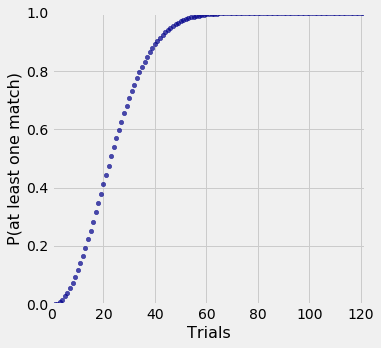

In [10]:
results.scatter('Trials', 'P(at least one match)')
plt.xlim(0, N/3)
plt.ylim(0, 1);

You can see that if there are more than about 50 people, then the chance of a matching pair of birthdays is pretty close to 1. 

How many people must there be for the chance of a collision to be more than 50%? Let's see if we can find the smallest number of people for which this happens.

In [11]:
results.where('P(at least one match)', are.between(0.5, 0.51))

Trials,P(all different),P(at least one match)
23,0.492703,0.507297


With just 23 people, a match is more likely than not. This surprises those who haven't done the calculation, and hence is known as the *birthday paradox*. But in fact there is nothing paradoxical or contradictory about it at all. It just has to do with the way the chance of a matching pair of birthdays grows as a function of the number of people.

We have done the calculation for $N = 365$, but how fast would the function have grown had $N$ been some other number? We need to know this if we are going to apply our results in contexts other than birthdays.

To figure this out, we could redo our code for various different values of $N$ and see what the output tells us for those values. But it is altogether more efficient and insightful to use math, which is what we will do in the next section.